#Twitter Sentiment Analysis

In [1]:

import numpy as np 
import pandas as pd 

In [2]:
# Filtering and storing only necessary columns
data = pd.read_csv('Sentiment.csv')
data = data[['text','sentiment']]

In [3]:
data.head(10)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
7,Going on #MSNBC Live with @ThomasARoberts arou...,Neutral
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative


In [4]:

from sklearn.model_selection import train_test_split 
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments from datasets
data_prep = train[train.sentiment != "Neutral"]

In [5]:
#Separating the positive and negative data from dataset
train_positive = data_prep[ data_prep['sentiment'] == 'Positive']
train_positive = train_positive['text']
train_negative = data_prep[ data_prep['sentiment'] == 'Negative']
train_negative = train_negative['text']

In [6]:
#Importing wordcloud and matplotlib
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [7]:
#Defining a function to plot the datas in wordcloud
def wc_draw(datas, color = 'black'):
    words = ' '.join(datas)
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
    words = WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(words)
    plt.axis('off')
    plt.show()

 ==== Positive words ====


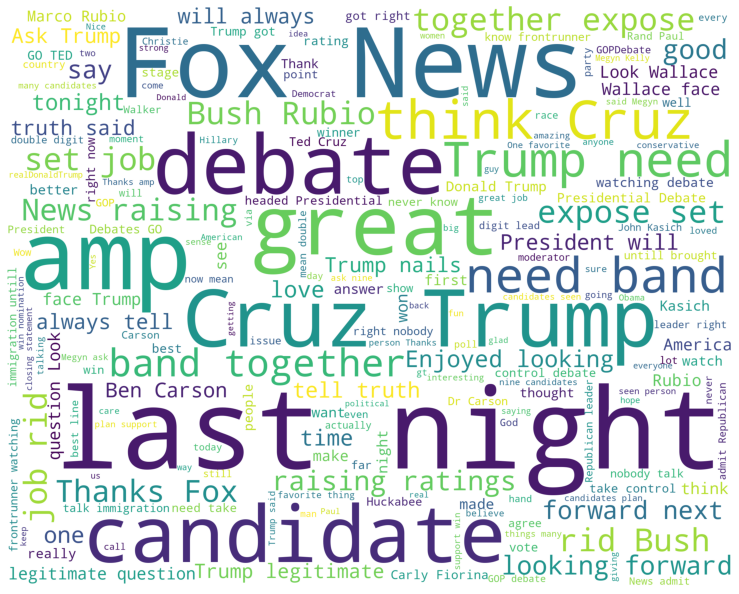

In [8]:
#printing the positive words using wordcloud
print(" ==== Positive words ====")
wc_draw(train_positive,'white')

====  Negative words  ====


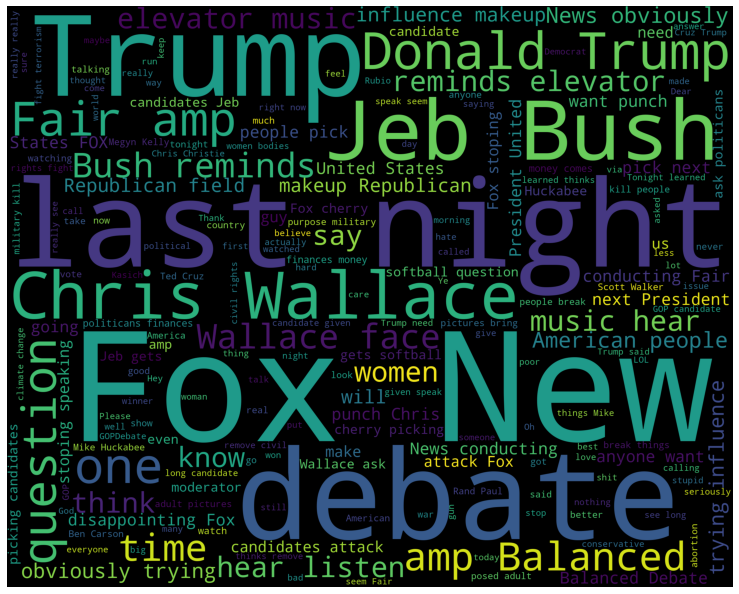

In [9]:
#plotting the negative words using wordcloud
print("====  Negative words  ====")
wc_draw(train_negative)

In [10]:
#Importing NLTK library
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#cleaning and preProcessing the data
tweets = []
stopwords = set(stopwords.words("english"))
for index, row in train.iterrows():
    filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    cleaned = [word for word in filtered if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT']
    words_without_stopwords = [word for word in cleaned if not word in stopwords]
    tweets.append((words_without_stopwords, row.sentiment))

In [12]:
#Diving the positive and negative datas from dataset
test_positive = test[ test['sentiment'] == 'Positive']
test_positive = test_positive['text']
test_negative = test[ test['sentiment'] == 'Negative']
test_negative = test_negative['text']

In [13]:
#Defining a function to extract words
def take_words_from_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [14]:
#Defining a function to get word features
def word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features


In [15]:
words_feature = word_features(take_words_from_tweets(tweets))
words_feature

dict_keys(['american', 'people', 'pick', 'next', 'president', 'united', 'states', 'fox', 'news', 'oh,', 'veto', 'corleone', 'vito', 'corleone.', 'get', 'now.', 'question', 'god', 'veterans.', 'softball.', 'agree.', 'carson', 'compelling', 'given', 'chance.', 'greatest', 'let', 'television', 'history:', 'help', 'aka', 'swell', 'ranks', 'ratings', '.@fredbarnes,', '"mike', 'huckabee', 'star', 'luntz', 'focus', 'group', 'show.', 'spoke,', 'feedback', 'political', 'nonsense', 'last', 'night.', '(see', 'site.)…', 'questions', 'shld', 'journos', 'ask', 'candidates', 'comes', 'reporting', 'poverty?', 'reduces', 'need', 'oil', 'imports', 'hostile', 'foreign', 'regions,', 'helps', 'keep', 'military', 'middle', 'east', 'conflicts.', 'perfect', 'remedy', 'hangover', 'like', 'effie', 'hunger', 'games.', 'troll', 'job', "night's", 'masterpiece', 'internet', 'meta-mockery.', 'no,', 'rand', 'paul', 'budget,', 'budgets...', 'multiple', 'sets', 'books?', 'yep...', 'got', 'caught', 'felt', 'write', 'jok

In [16]:
#Defining function to extract the features from the documents
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in words_feature:
        features['contains(%s)' % word] = (word in document_words)
    return features

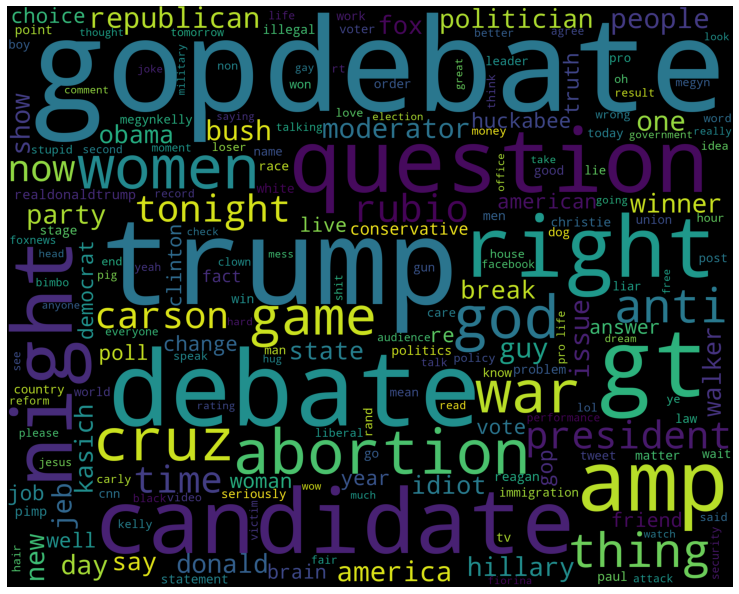

In [17]:
wc_draw(words_feature)

In [18]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [19]:

positive_count = 0
negative_count = 0
for obj in test_positive: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        positive_count = positive_count + 1
for obj in test_negative: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        negative_count = negative_count + 1


print('[Positive]: %s/%s '  % (len(test_positive),positive_count))          
print('[Negative]: %s/%s '  % (len(test_negative),negative_count))        


[Positive]: 206/70 
[Negative]: 884/764 
